In [1]:
# define libraries to use
import pandas as pd
import numpy as np
from pathlib import Path
import requests,json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as sp
%matplotlib inline

def millions(x,pos):
    return '%1.1fM' % (x * 1e-6)

# variables that need initialization

# NY state vehicle registrations
nydmvDf = None



In [2]:
#nydmvDf = pd.read_csv("data/nydmv/nydmv.csv",encoding = "unicode_escape", low_memory=False)
# read "preindexed" records
nydmvDf = pd.read_csv("data/nydmv/nydmv-withidx.csv", low_memory=False)
nydmvDf.set_index("entry", inplace=True)


# NYS DMV Data Verification

In [3]:
print(nydmvDf.info(verbose=True,show_counts=True))
nydmvDf["Record Type"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12586701 entries, 0 to 12586700
Data columns (total 20 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Record Type           12586701 non-null  object 
 1   VIN                   12586515 non-null  object 
 2   Registration Class    12586701 non-null  object 
 3   City                  12586701 non-null  object 
 4   State                 12586701 non-null  object 
 5   Zip                   12586701 non-null  int64  
 6   County                12586701 non-null  object 
 7   Model Year            12586677 non-null  float64
 8   Make                  12586691 non-null  object 
 9   Body Type             12586701 non-null  object 
 10  Fuel Type             12567068 non-null  object 
 11  Unladen Weight        9695237 non-null   float64
 12  Maximum Gross Weight  2271426 non-null   float64
 13  Passengers            221924 non-null    float64
 14  Reg Valid Date  

VEH     11350911
TRL       837817
BOAT      378340
SNOW       19633
Name: Record Type, dtype: int64

In [4]:
# keep motor vehicles only, column can be dropped sint there's only one type of record
nydmvDf = nydmvDf[nydmvDf["Record Type"] == "VEH"].drop(columns=["Record Type","Color"])

nydmvDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350911 entries, 2 to 12586700
Data columns (total 18 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   VIN                   11350905 non-null  object 
 1   Registration Class    11350911 non-null  object 
 2   City                  11350911 non-null  object 
 3   State                 11350911 non-null  object 
 4   Zip                   11350911 non-null  int64  
 5   County                11350911 non-null  object 
 6   Model Year            11350911 non-null  float64
 7   Make                  11350909 non-null  object 
 8   Body Type             11350911 non-null  object 
 9   Fuel Type             11350911 non-null  object 
 10  Unladen Weight        9566909 non-null   float64
 11  Maximum Gross Weight  1561939 non-null   float64
 12  Passengers            221924 non-null    float64
 13  Reg Valid Date        11350911 non-null  object 
 14  Reg Expiration D

In [5]:
nydmvDf.describe(include="all")

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
count,11350905,11350911,11350911,11350911,1.135091e+07,11350911,1.135091e+07,11350909,11350911,11350911,9.566909e+06,1.561939e+06,221924.000000,11350911,11155400,11350911,11350911,11350911
unique,11350905,68,28432,82,NaN,63,NaN,7611,57,8,NaN,NaN,NaN,2830,826,2,2,2
top,9999236,PAS,BROOKLYN,NY,NaN,SUFFOLK,NaN,TOYOT,SUBN,GAS,NaN,NaN,NaN,05/31/2022,04/30/2023,N,N,N
freq,1,9285934,560565,11206294,NaN,1314605,NaN,1287162,5458792,10752568,NaN,NaN,NaN,63540,405776,11330138,11193891,11344176
mean,NaN,NaN,NaN,NaN,1.270068e+04,NaN,2.012962e+03,NaN,NaN,NaN,4.123404e+03,8.996256e+03,9.484869,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.961370e+03,NaN,9.149883e+00,NaN,NaN,NaN,5.925678e+03,1.087036e+04,11.013074,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.900000e+03,NaN,NaN,NaN,1.000000e+00,5.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.123600e+04,NaN,2.009000e+03,NaN,NaN,NaN,3.173000e+03,4.916000e+03,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.195000e+04,NaN,2.015000e+03,NaN,NaN,NaN,3.532000e+03,5.500000e+03,5.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.350100e+04,NaN,2.019000e+03,NaN,NaN,NaN,4.189000e+03,8.900000e+03,7.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
nydmvDf["Fuel Type"].unique()

array(['GAS', 'PROPANE', 'DIESEL', 'NONE', 'FLEX', 'ELECTRIC', 'COMP N/G',
       'OTHER'], dtype=object)

In [7]:
# Set categorical variables
nydmvDf["Registration Class"] = nydmvDf["Registration Class"].astype('category')
nydmvDf["State"] = nydmvDf["State"].astype('category')
nydmvDf["Make"] = nydmvDf["Make"].astype('category')
nydmvDf["Body Type"] = nydmvDf["Body Type"].astype('category')
nydmvDf["Fuel Type"] = nydmvDf["Fuel Type"].astype('category')
nydmvDf["Zip"] = nydmvDf["Zip"].astype('category')
nydmvDf["Model Year"] = nydmvDf["Model Year"].astype('Int64')
nydmvDf["Scofflaw Indicator"] = nydmvDf["Scofflaw Indicator"].map({"Y":True,"N":False})
nydmvDf["Suspension Indicator"] = nydmvDf["Suspension Indicator"].map({"Y":True,"N":False})
nydmvDf["Revocation Indicator"] = nydmvDf["Revocation Indicator"].map({"Y":True,"N":False})
nydmvDf["Reg Valid Date"] = pd.to_datetime(nydmvDf["Reg Valid Date"], format="%m/%d/%Y")
nydmvDf["Reg Expiration Date"] = pd.to_datetime(nydmvDf["Reg Valid Date"], format="%m/%d/%Y")

#nydmvDf.rename_axis("entry",inplace=True)
nydmvDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350911 entries, 2 to 12586700
Data columns (total 18 columns):
 #   Column                Non-Null Count     Dtype         
---  ------                --------------     -----         
 0   VIN                   11350905 non-null  object        
 1   Registration Class    11350911 non-null  category      
 2   City                  11350911 non-null  object        
 3   State                 11350911 non-null  category      
 4   Zip                   11350911 non-null  category      
 5   County                11350911 non-null  object        
 6   Model Year            11350911 non-null  Int64         
 7   Make                  11350909 non-null  category      
 8   Body Type             11350911 non-null  category      
 9   Fuel Type             11350911 non-null  category      
 10  Unladen Weight        9566909 non-null   float64       
 11  Maximum Gross Weight  1561939 non-null   float64       
 12  Passengers            2219

In [8]:
#nydmvDf.info(verbose=True,show_counts=True)

In [9]:
nydmvDf.isna().sum()


VIN                            6
Registration Class             0
City                           0
State                          0
Zip                            0
County                         0
Model Year                     0
Make                           2
Body Type                      0
Fuel Type                      0
Unladen Weight           1784002
Maximum Gross Weight     9788972
Passengers              11128987
Reg Valid Date                 0
Reg Expiration Date            0
Scofflaw Indicator             0
Suspension Indicator           0
Revocation Indicator           0
dtype: int64

In [10]:
nydmvDf[nydmvDf["VIN"].isna()]

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
entry,,,,,,,,,,,,,,,,,,
12586517,NaN,PAS,SARATOGA SPRNG,NY,12866,SARATOGA,1908,FORD,CONV,GAS,1598.0,NaN,NaN,2022-09-16,2022-09-16,False,False,False
12586521,NaN,HIS,BUFFALO,NY,14216,ERIE,1966,FORD,2DSD,GAS,2500.0,NaN,NaN,2022-08-10,2022-08-10,False,False,False
12586534,NaN,HIS,STERLING,NY,13156,CAYUGA,1966,FORD,PICK,GAS,7500.0,NaN,NaN,2022-06-14,2022-06-14,False,False,False
12586572,NaN,SRF,RYE,NY,10580,WESTCHESTER,1967,FORD,2DSD,GAS,3200.0,NaN,NaN,2022-02-04,2022-02-04,False,False,False
12586644,NaN,SRF,ORCHARD PARK,NY,14127,ERIE,1948,PLAYB,2DSD,GAS,2035.0,NaN,NaN,2021-03-14,2021-03-14,False,False,False
12586700,NaN,PSD,COPAKE,NY,12516,COLUMBIA,1968,STEVE,TRLR,NONE,5760.0,NaN,NaN,2014-08-01,2014-08-01,False,False,False


In [11]:
nydmvDf[nydmvDf["Make"].isna()]

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
entry,,,,,,,,,,,,,,,,,,
10020191,TZE367V100330,PAS,SOUTHAMPTON,NY,11968,SUFFOLK,1977,NaN,H/WH,GAS,9980.0,NaN,NaN,2020-11-17,2020-11-17,False,False,False
10062339,SMT920K11DT575348,MOT,WOODSIDE,NY,11377,QUEENS,2013,NaN,MCY,GAS,480.0,NaN,NaN,2022-04-27,2022-04-27,False,False,False


In [12]:
# romeve unneccesary columns
#nydmvDf.drop(columns=["Record Type","Registration Class","Unladen Weight","Maximum Gross Weight","Passengers","Color","Scofflaw Indicator","Suspension Indicator","Revocation Indicator"],inplace=True)

In [13]:
nydmvDf.dropna(subset=["VIN","Make"],inplace=True)

In [14]:
# check how many vehicles with Model Year > 1981
(nydmvDf["Model Year"] >= 1981).sum() / len(nydmvDf)
#nydmvDf[nydmvDf["Model Year"] >= 1981].info(verbose=True, show_counts = True)

0.9850242751611921

In [15]:
# drop cars older than 1981 in order to align with VIN code support
nydmvDf = nydmvDf[nydmvDf["Model Year"] >= 1981]

In [16]:
nydmvDf.describe(include="all")

/var/folders/4d/pq_2_fgs7s3bjnxxpgksl2880000gn/T/ipykernel_6574/3206018318.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nydmvDf.describe(include="all")
/var/folders/4d/pq_2_fgs7s3bjnxxpgksl2880000gn/T/ipykernel_6574/3206018318.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nydmvDf.describe(include="all")


,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
count,11180915,11180915,11180915,11180915,11180915.0,11180915,1.118092e+07,11180915,11180915,11180915,9.412858e+06,1.546175e+06,221882.000000,11180915,11180915,11180915,11180915,11180915
unique,11180915,67,28108,79,9952.0,63,NaN,6586,56,8,NaN,NaN,NaN,2461,2461,2,2,2
top,99906,PAS,BROOKLYN,NY,11746.0,SUFFOLK,NaN,TOYOT,SUBN,GAS,NaN,NaN,NaN,2022-05-31 00:00:00,2022-05-31 00:00:00,False,False,False
freq,1,9195200,557551,11037118,55579.0,1293239,NaN,1286586,5453105,10587875,NaN,NaN,NaN,61305,61305,11160150,11024549,11174182
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-04-23 00:00:00,1981-04-23 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01 00:00:00,2022-12-01 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.013679e+03,NaN,NaN,NaN,4.132472e+03,9.021065e+03,9.485321,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.954327e+00,NaN,NaN,NaN,5.936979e+03,1.088383e+04,11.013032,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.981000e+03,NaN,NaN,NaN,1.000000e+00,5.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.010000e+03,NaN,NaN,NaN,3.180000e+03,4.921000e+03,5.000000,NaN,NaN,NaN,NaN,NaN


In [17]:
print("Vehicles reg in NY State = ",nydmvDf["State"].value_counts()["NY"]/len(nydmvDf)*100,"%")

Vehicles reg in NY State =  98.71390668831665 %


In [18]:
print(nydmvDf["Body Type"].value_counts().sort_values(ascending=False).to_csv(None))

,Body Type
SUBN,5453105
4DSD,2983560
PICK,1254234
MCY,315429
2DSD,305558
VAN,231824
CONV,144160
ATV,83785
DUMP,82629
BUS,59458
UTIL,42833
TRAC,39748
DELV,25347
H/WH,25090
SEDN,20035
FLAT,16895
TRLR,15508
P/SH,9614
MOPD,8804
TANK,8426
STAK,8422
TAXI,7490
TOW,6722
REFG,5107
LTRL,4405
RBM,4056
CMIX,2592
RD/S,2445
TR/C,2161
SEMI,1575
AMBU,1501
LSV,1118
S/SP,883
FIRE,877
HRSE,771
T/CR,759
SWT,666
EMVR,579
SN/P,494
LIM,493
W/DR,362
DCOM,335
H/TR,253
W/SR,227
CUST,178
R/RD,177
FPM,78
MCC,48
LSVT,37
H/IN,31
LOCO,15
BOAT,7
TR/E,4
TRAV,3
POLE,1
????,1
RPLC,0



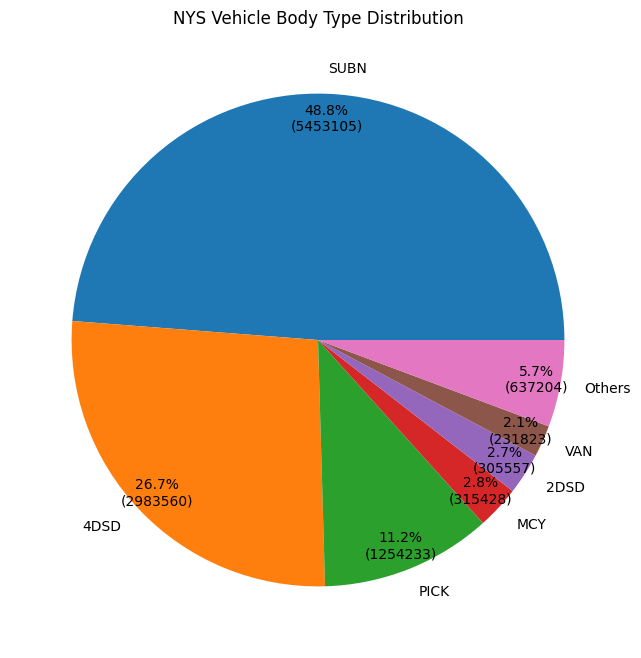

In [19]:
nysVehBody = nydmvDf["Body Type"].value_counts().sort_values(ascending=False)
nysVehBody = nysVehBody[nysVehBody/len(nydmvDf) > 0.015]
nysVehBody.loc["Others"] = len(nydmvDf) - nysVehBody.sum()

def func(pct):
    absolute = int(pct/100.*len(nydmvDf))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#autopct = "%1.1f%%" if not using function

_ = nysVehBody.plot.pie(figsize=(8,8),legend = False, title = "NYS Vehicle Body Type Distribution", \
    ylabel = "", autopct=lambda pct: func(pct), pctdistance = 0.9, rotatelabels = False)

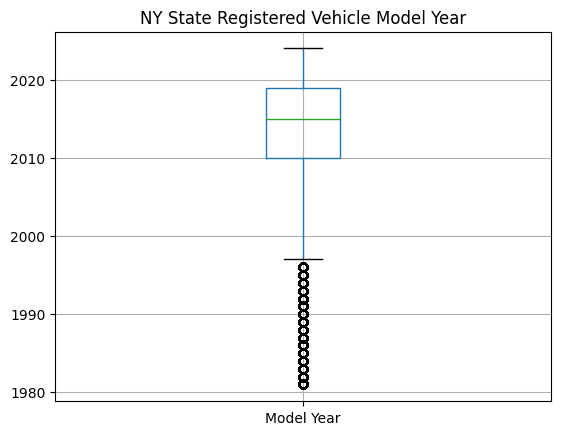

In [20]:
ax = nydmvDf.boxplot(column="Model Year")
_ = ax.set_title("NY State Registered Vehicle Model Year")

Text(0, 0.5, 'Number of Vehicles')

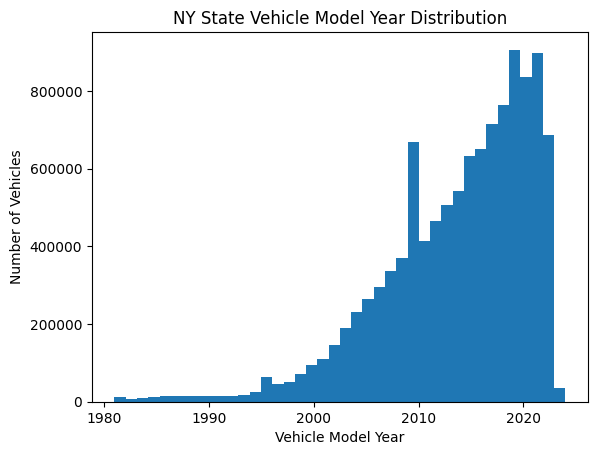

In [21]:
ax = nydmvDf["Model Year"].plot.hist(bins=40,title="NY State Vehicle Model Year Distribution")
ax.set_xlabel('Vehicle Model Year')
ax.set_ylabel('Number of Vehicles')

In [22]:
nydmvDf["Model Year"].value_counts()

2019    906577
2021    897333
2020    835385
2018    765496
2017    714581
2022    685950
2016    651156
2015    633316
2014    542768
2013    506567
2012    465417
2011    413967
2008    370326
2010    359479
2007    337573
2009    309224
2006    295645
2005    265023
2004    231913
2003    189986
2002    146569
2001    110863
2000     95579
1999     72312
1998     51088
1997     44612
2023     35736
1995     32837
1996     31079
1994     23811
1993     18470
1989     15023
1992     14937
1987     14836
1991     14813
1990     14383
1988     13866
1986     13489
1985     11481
1984      8916
1982      6263
1983      6193
1981      5956
2024       121
Name: Model Year, dtype: Int64

In [23]:
# Vehicle Make 
# accidents harmul events
nysVehMake = pd.DataFrame(nydmvDf["Make"].value_counts().sort_values(ascending=False)).head(20)
nysVehMake.columns = ["TotalVehicles"]
#nysVehMake["Make"] = vehModDf.index.values
#nysVehMake.set_index("Make",inplace=True)
totalNYVeh = len(nydmvDf)
nysVehMake.loc["Others"] = [totalNYVeh - nysVehMake["TotalVehicles"].sum()]
nysVehMake

,TotalVehicles
TOYOT,1286586
HONDA,1234123
FORD,1152731
CHEVR,1151780
NISSA,687161
JEEP,607999
SUBAR,510654
HYUND,412515
DODGE,306874
BMW,289745


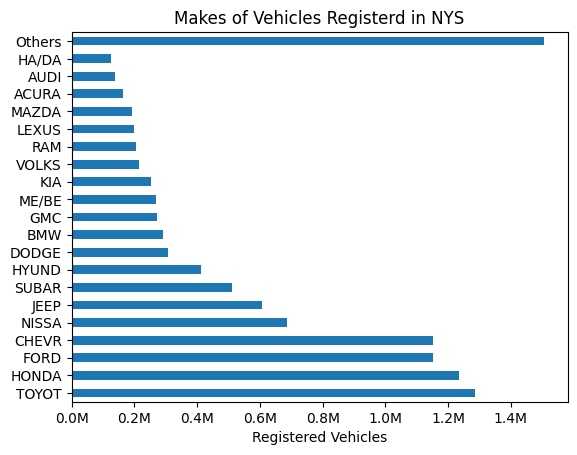

In [24]:
ax = nysVehMake["TotalVehicles"].plot.barh(title = "Makes of Vehicles Registerd in NYS")
ax.set_xlabel('Registered Vehicles')
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.1fM'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
#nysVehMake["TotalVehicles"]

In [25]:
#nydmvDf["VIN"].to_csv("tmp/NYDMV-VIN.csv",index=True)

In [26]:
nydmvDf[nydmvDf["Unladen Weight"].isna()].describe(include="all",datetime_is_numeric=True)

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
count,1768057,1768057,1768057,1768057,1768057.0,1768057,1.768057e+06,1768057,1768057,1768057,0.0,1.546175e+06,221882.000000,1768057,1768057,1768057,1768057,1768057
unique,1768057,16,11278,60,4754.0,63,NaN,1281,47,8,NaN,NaN,NaN,NaN,NaN,2,2,2
top,9BWGT61J614031513,PAS,BROOKLYN,NY,74134.0,SUFFOLK,NaN,FORD,PICK,GAS,NaN,NaN,NaN,NaN,NaN,False,False,False
freq,1,790465,59191,1678233,30301.0,191887,NaN,453445,1190703,1461877,NaN,NaN,NaN,NaN,NaN,1765856,1751889,1761360
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.013193e+03,NaN,NaN,NaN,NaN,9.021065e+03,9.485321,2021-12-16 17:55:27.430959104,2021-12-16 17:55:27.430959104,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.981000e+03,NaN,NaN,NaN,NaN,5.000000e+00,1.000000,2019-12-09 00:00:00,2019-12-09 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.008000e+03,NaN,NaN,NaN,NaN,4.921000e+03,5.000000,2021-07-09 00:00:00,2021-07-09 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.015000e+03,NaN,NaN,NaN,NaN,5.500000e+03,5.000000,2022-01-20 00:00:00,2022-01-20 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.019000e+03,NaN,NaN,NaN,NaN,8.900000e+03,7.000000,2022-06-09 00:00:00,2022-06-09 00:00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2.024000e+03,NaN,NaN,NaN,NaN,7.250010e+05,862.000000,2022-10-01 00:00:00,2022-10-01 00:00:00,NaN,NaN,NaN


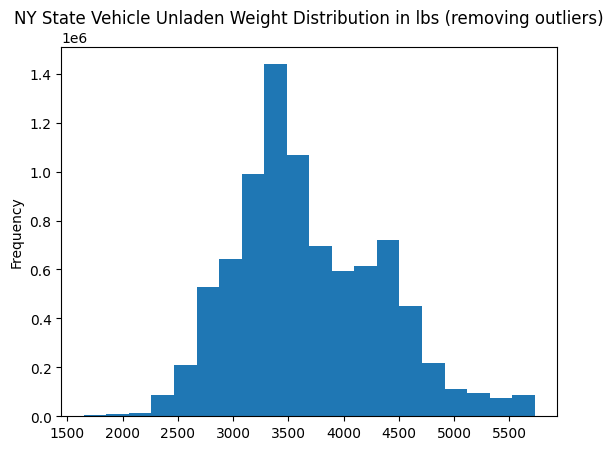

In [27]:
#_ = nydmvDf["Unladen Weight"].plot.hist(bins=5,title="NY State Vehicle UNladen Weight Distribution")
x = nydmvDf["Unladen Weight"]
#x = x[x.between(x.quantile(.25), x.quantile(.75))]
q1 = x.quantile(.25)
q3 = x.quantile(.75)
IQR = q3 - q1
outmin = q1 - 1.5*IQR
outmax = q3 + 1.5*IQR

x = x[x.between(outmin, outmax)]
ax = x.plot.hist(bins=20,title="NY State Vehicle Unladen Weight Distribution in lbs (removing outliers)")
#ax.plot.
#_ = x.plot(kind='hist', title='NY State Vehicle Unladen Weight Distribution (removing outliers)', xlabel='Unladen Weight', ylabel='Number of Vehicles')
# _ = nydmvDf["Unladen Weight"].plot.density(title="NY State Vehicle UNladen Weight Distribution")
#_ = pd.DataFrame(x).boxplot(column="Unladen Weight")
# _ = ax.set_title("NY State Registered Vehicle Model Year")


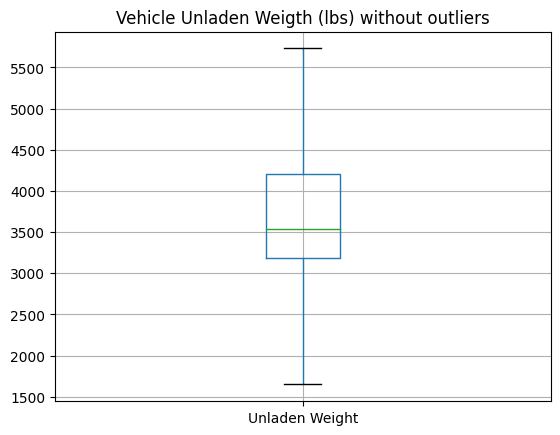

In [28]:
ax = nydmvDf.boxplot(column="Unladen Weight",showfliers = False)
_ = ax.set_title("Vehicle Unladen Weigth (lbs) without outliers")

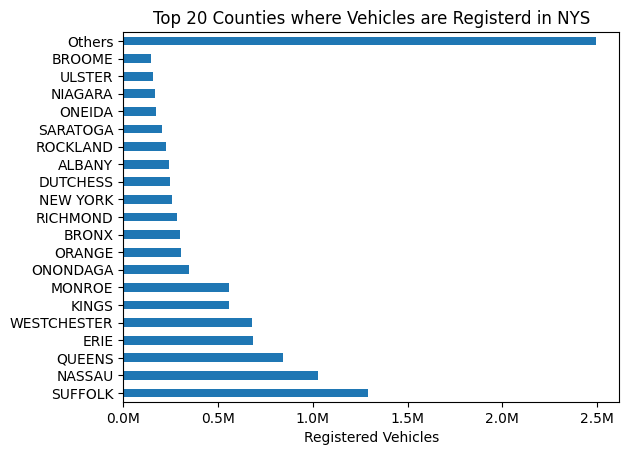

In [29]:
nysVehCity = pd.DataFrame(nydmvDf["County"].value_counts().sort_values(ascending=False)).head(20)
nysVehCity.columns = ["TotalVehicles"]
#nysVehMake["Make"] = vehModDf.index.values
#nysVehMake.set_index("Make",inplace=True)
nysVehCity.loc["Others"] = [totalNYVeh - nysVehCity["TotalVehicles"].sum()]
nysVehCity

#fig, ax = plt.subplots()
#ax.fmt_ydata = millions
ax = nysVehCity["TotalVehicles"].plot.barh(title = "Top 20 Counties where Vehicles are Registerd in NYS")
#ax.barh(nysVehCity["TotalVehicles"].index,nysVehCity["TotalVehicles"])
ax.set_xlabel('Registered Vehicles')
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%1.1fM'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))

#ax.set_title('Scores by group and gender')
#nysVehMake["TotalVehicles"]
